In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

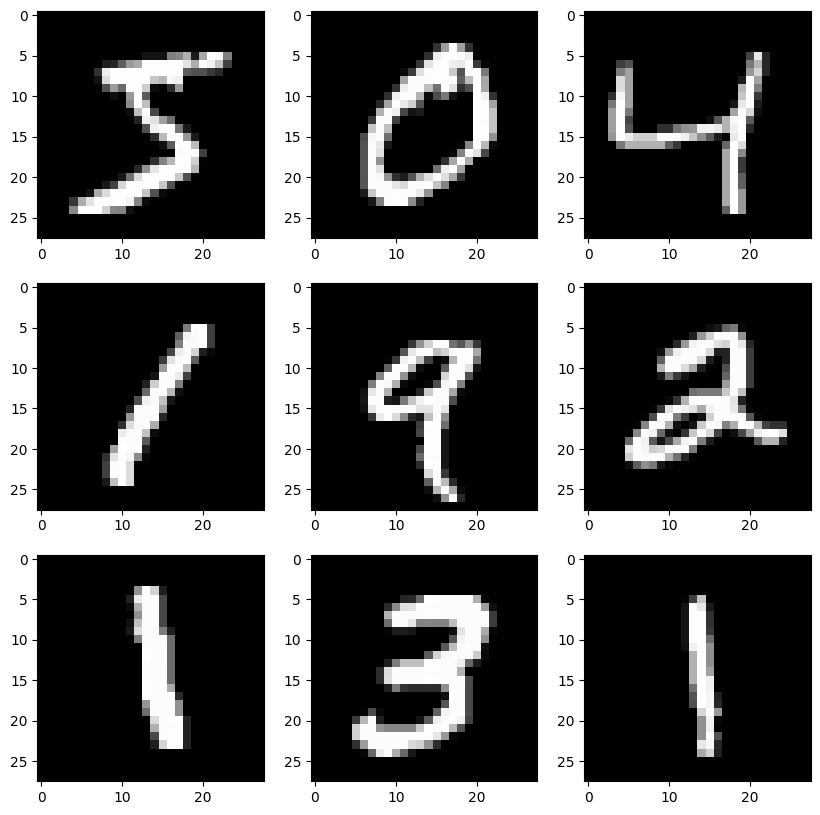

In [5]:
X_train_full[4]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

a = 0

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [6]:
X_val, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255

In [7]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [8]:
class_names[y_train[1]]

'3'

In [9]:
# keras 

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="relu", kernel_regularizer= keras.regularizers.l2(0.01)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_2, built=True>]

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# sparsecategorical_cross entropy computes the crossentropy loss between the labels and the predictions

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
# batch is a hyperparameter that defines the number of samples to work through before updating the internal model parameters

# epochs defines how many times to do a pass over all the dataset

history = model.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val), batch_size=32)

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6769 - loss: 2.4371 - val_accuracy: 0.9126 - val_loss: 1.1674
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8921 - loss: 1.1010 - val_accuracy: 0.9276 - val_loss: 0.7355
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9069 - loss: 0.7251 - val_accuracy: 0.9312 - val_loss: 0.5202
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9193 - loss: 0.5263 - val_accuracy: 0.9420 - val_loss: 0.3942
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9283 - loss: 0.4150 - val_accuracy: 0.9468 - val_loss: 0.3283
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9326 - loss: 0.3563 - val_accuracy: 0.9498 - val_loss: 0.2872
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9383 - loss: 0.3129 - val_accuracy: 0.9516 - val_loss: 0.2577
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9421 - loss: 0.2868 - 

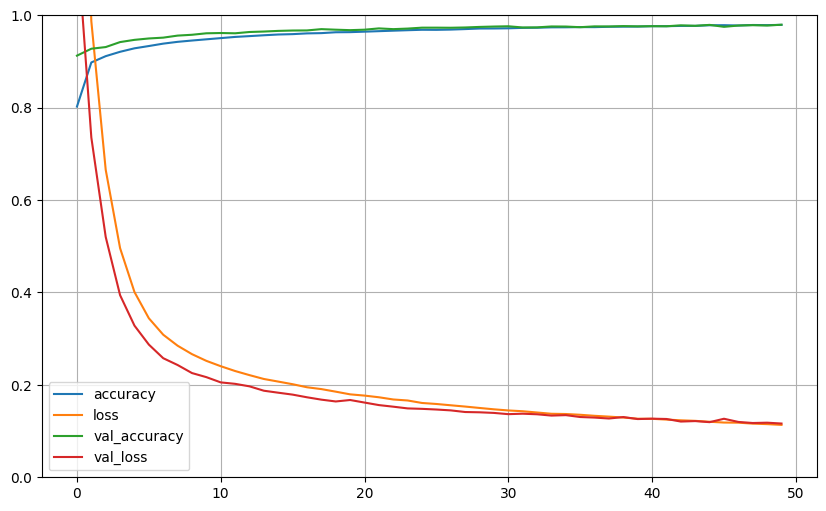

In [15]:
import pandas as pd

x = pd.DataFrame(history.history)
#plt.plot(x)
x.plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
#model evaluation

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.1379


[0.12221653014421463, 0.9743000268936157]

In [17]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [18]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    2,    1,    2,    1,    3,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    1,    5,    0],
       [   5,    1,  996,    8,    6,    0,    1,    6,    9,    0],
       [   0,    0,    2,  999,    0,    1,    0,    3,    3,    2],
       [   0,    0,    1,    0,  962,    0,    4,    1,    1,   13],
       [   3,    1,    1,   11,    1,  858,    6,    1,    5,    5],
       [   6,    3,    0,    0,   14,    5,  925,    0,    5,    0],
       [   1,    8,    6,    7,    2,    0,    0,  991,    2,   11],
       [   5,    0,    2,    9,    4,    5,    4,    3,  939,    3],
       [   3,    2,    0,   10,    4,    0,    1,    4,    1,  984]],
      dtype=int32)>

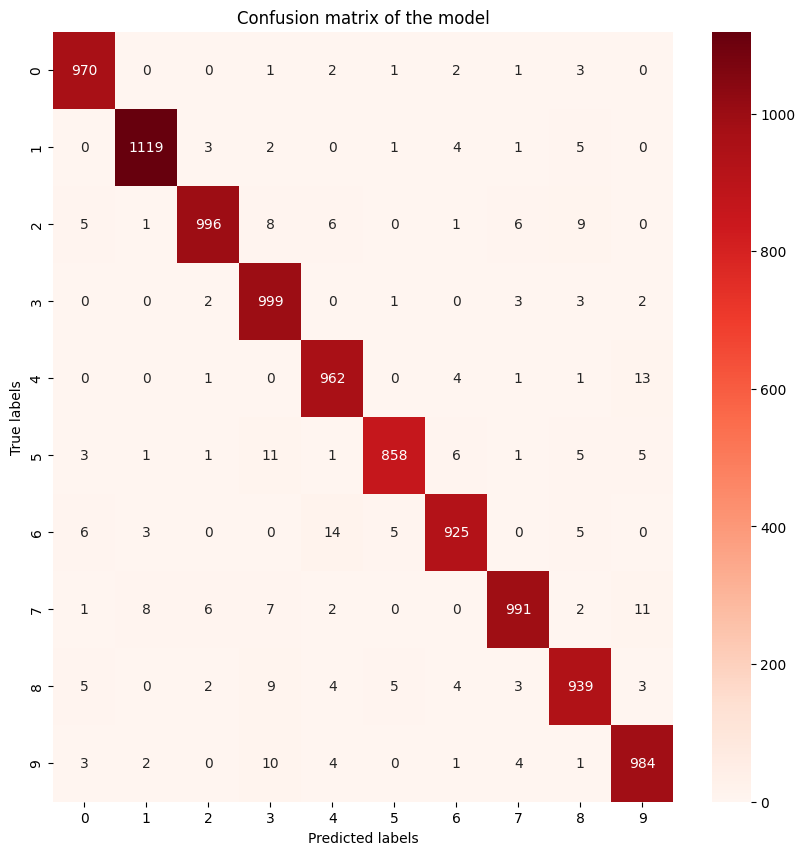

In [19]:
import seaborn as sn

fig = sn.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Reds')

fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion matrix of the model')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10,10)

plt.show()

In [20]:
# the concept of hyperparameters
